In [15]:
# Question=7

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv("diabetes1.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,NaN,1.0


In [17]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               763 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             763 non-null    float64
 3   SkinThickness             765 non-null    float64
 4   Insulin                   764 non-null    float64
 5   BMI                       763 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       762 non-null    float64
 8   Outcome                   767 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [18]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   763.000000  768.000000     763.000000     765.000000  764.000000   
mean      3.855832  120.894531      69.458716      20.583007   80.086387   
std       3.370036   31.972618      18.757656      15.947639  115.434618   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      64.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   34.000000   
75%       6.000000  140.250000      80.000000      32.000000  128.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  763.000000                768.000000  762.000000  767.000000  
mean    31.997248                  0.471876   33.240157    0.349413  
std      7.908138                  0.331329   11.785035    0.477096  
min      0.000000                  

In [19]:
print(df.isnull().sum())

Pregnancies                 5
Glucose                     0
BloodPressure               5
SkinThickness               3
Insulin                     4
BMI                         5
DiabetesPedigreeFunction    0
Age                         6
Outcome                     1
dtype: int64


In [20]:
df.shape

(768, 9)

In [21]:
df.dropna(inplace=True)

In [22]:
df.fillna(df.mean(),inplace=True)

In [23]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


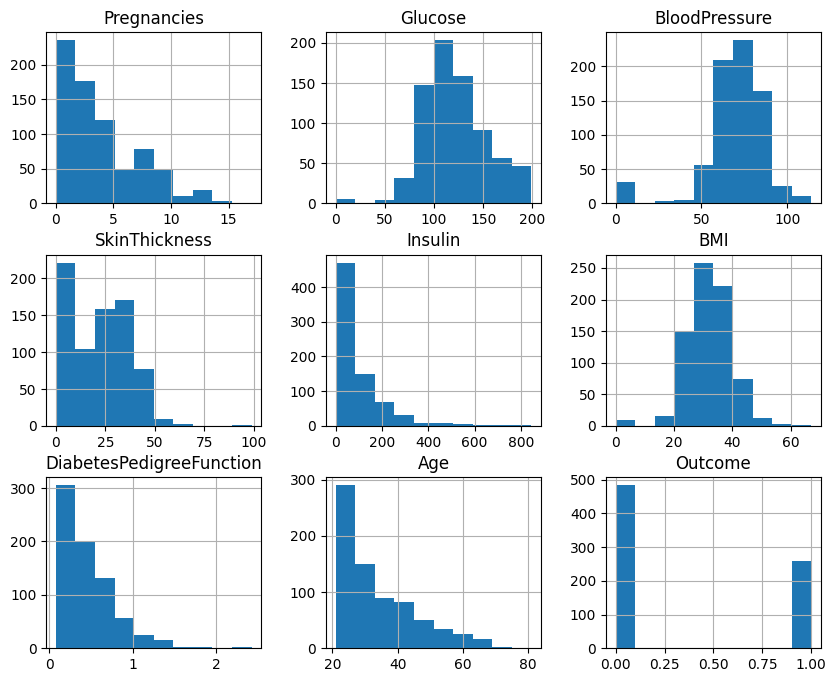

In [24]:
p=df.hist(figsize=(10,8))

In [25]:
scaler=StandardScaler()
X_scaled=pd.DataFrame(scaler.fit_transform(df.drop(columns=['Outcome'])),columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']) 

In [26]:
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.634065,0.831628,0.137981,0.898196,-0.694509,0.197413,0.471658,1.417418
1,-0.849279,-1.121984,-0.180568,0.522184,-0.694509,-0.706810,-0.370597,-0.195486
2,1.227402,1.916968,-0.286751,-1.295211,-0.694509,-1.133086,0.608983,-0.110596
3,-0.849279,-0.997945,-0.180568,0.146171,0.114192,-0.513048,-0.932100,-1.044383
4,-0.255942,-1.339052,-1.030031,0.710190,0.062573,-0.138441,-0.684917,-0.619934


In [27]:
X=X_scaled
y=df['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [29]:
train_scores=[]
test_scores=[]
for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    acc=accuracy_score(y_test,y_pred)
    print(f"Accuracy for K={i}:",acc)

Accuracy for K=1: 0.7449664429530202
Accuracy for K=2: 0.7248322147651006
Accuracy for K=3: 0.7516778523489933
Accuracy for K=4: 0.738255033557047
Accuracy for K=5: 0.7718120805369127
Accuracy for K=6: 0.7785234899328859
Accuracy for K=7: 0.7919463087248322
Accuracy for K=8: 0.7986577181208053
Accuracy for K=9: 0.785234899328859
Accuracy for K=10: 0.7718120805369127
Accuracy for K=11: 0.7651006711409396
Accuracy for K=12: 0.7785234899328859
Accuracy for K=13: 0.7919463087248322
Accuracy for K=14: 0.7919463087248322


In [30]:
print("Train scores",train_scores)
print("Test Scores",test_scores)

Train scores [1.0, 0.8215488215488216, 0.8501683501683501, 0.8198653198653199, 0.8080808080808081, 0.8013468013468014, 0.7794612794612794, 0.7710437710437711, 0.765993265993266, 0.7760942760942761, 0.7693602693602694, 0.7710437710437711, 0.7676767676767676, 0.7676767676767676]
Test Scores [0.7449664429530202, 0.7248322147651006, 0.7516778523489933, 0.738255033557047, 0.7718120805369127, 0.7785234899328859, 0.7919463087248322, 0.7986577181208053, 0.785234899328859, 0.7718120805369127, 0.7651006711409396, 0.7785234899328859, 0.7919463087248322, 0.7919463087248322]


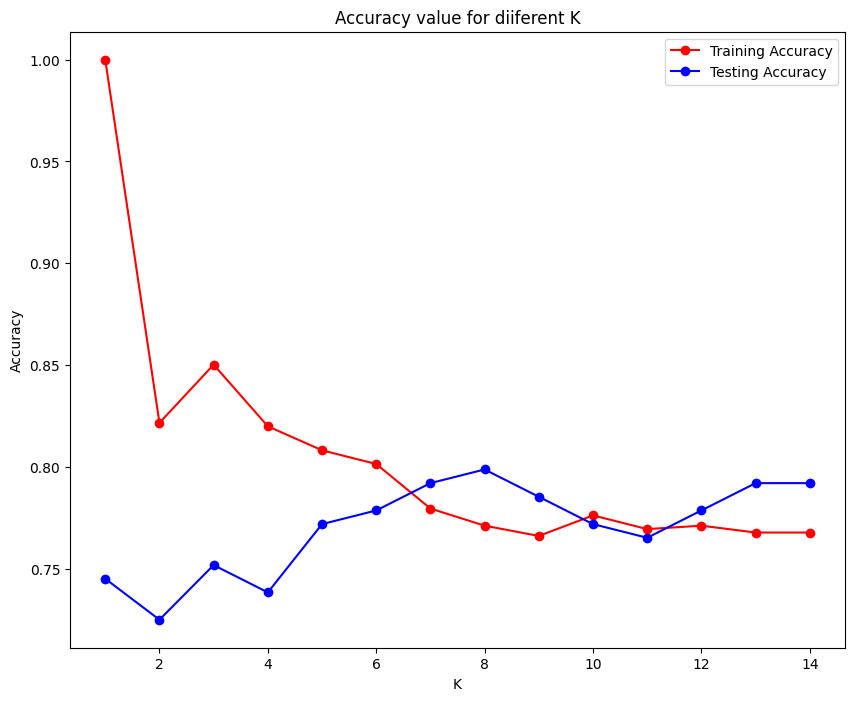

In [31]:
plt.figure(figsize=(10,8))
plt.plot(list(range(1,15)),train_scores,c="red",marker='o',label="Training Accuracy")
plt.plot(list(range(1,15)),test_scores,c="blue",marker='o',label="Testing Accuracy")
plt.title("Accuracy value for diiferent K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [32]:
train_scores=[]
test_scores=[]
distances=['euclidean','manhattan','cosine','chebyshev']
for i in range(len(distances)):
    knn=KNeighborsClassifier(metric=distances[i])
    knn.fit(X_train,y_train)

    test_scores.append(knn.score(X_test,y_test))
    train_scores.append(knn.score(X_train,y_train))

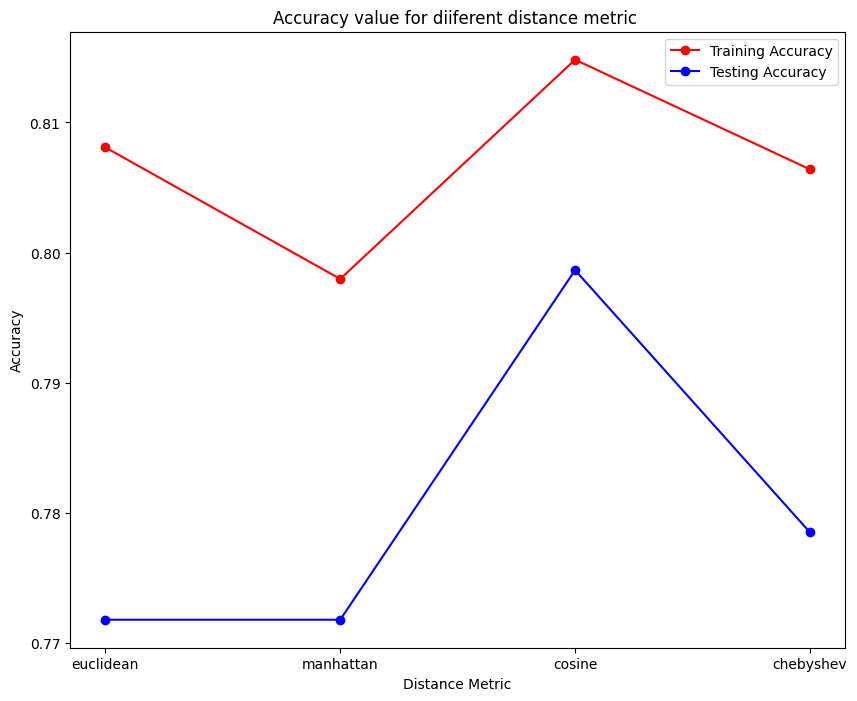

In [33]:
plt.figure(figsize=(10,8))
plt.plot(['euclidean','manhattan','cosine','chebyshev'],train_scores,c="red",marker='o',label="Training Accuracy")
plt.plot(['euclidean','manhattan','cosine','chebyshev'],test_scores,c="blue",marker='o',label="Testing Accuracy")
plt.title("Accuracy value for diiferent distance metric ")
plt.xlabel("Distance Metric")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
new_sample=[[1,90,61,31,80,29.1,0.61,30]]
predictions=knn.predict(new_sample)
print(f"Prediction for new sample is :",predictions)
if predictions==0:
    print("Person has no diabe